In [345]:
import pandas as pd
import numpy as np
from sklearn.cluster import HDBSCAN

DATAPATH = "../dataframes/experiment3/MG_3_components_3.csv"

df = pd.read_csv(DATAPATH, index_col=0)
df_test = df.loc[(df["split"] == "test")] #  & (~df["faint"])
columns = [f"percentile_{i}" for i in np.arange(5,100,5)]
X_test = df_test[columns]
index = X_test.index
X_test.shape

(22165, 19)

In [348]:
hdb = HDBSCAN(min_cluster_size=500,  min_samples=50, n_jobs=-1) # min_cluster_size=500,  min_samples=15
cluster = hdb.fit_predict(X_test)
X_test["cluster"] = cluster

/tmp/ipykernel_2601936/1302209529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["cluster"] = cluster


In [349]:
X_test["cluster"].value_counts()

cluster
 5    13102
 4     2702
 0     1550
 6     1457
 3     1210
 2     1124
 1      711
-1      309
Name: count, dtype: int64

In [239]:
from sklearn.manifold import TSNE

In [350]:
X_test_embedded = TSNE(n_components=2, perplexity=95, max_iter=5000, n_jobs=-1).fit_transform(X_test.iloc[:, :-1])
X_test_embedded = pd.DataFrame(X_test_embedded, columns=["x1", "x2"])

In [351]:
X_test_embedded["cluster"] = cluster
X_test_embedded["cluster"] = X_test_embedded["cluster"].astype(str)

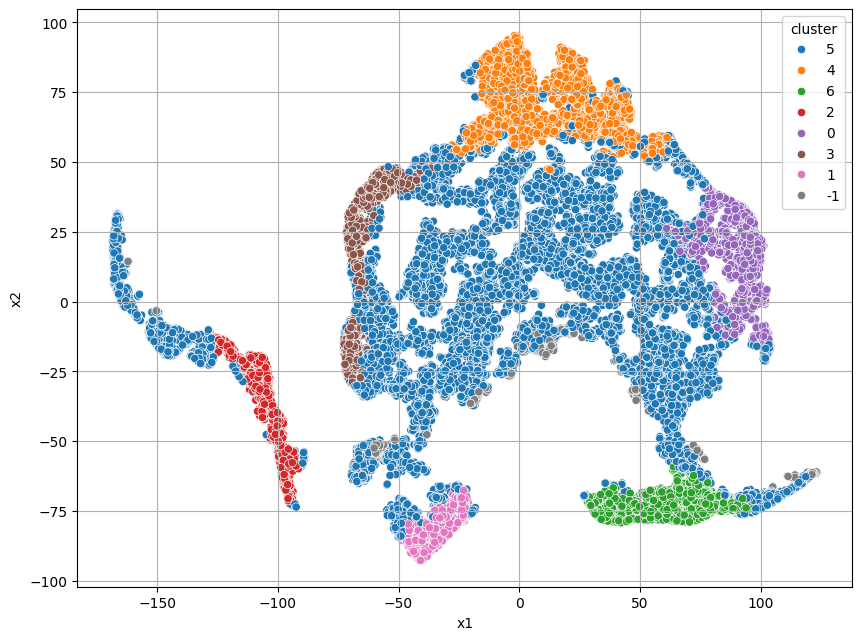

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7.5))
sns.scatterplot(data=X_test_embedded, x="x1", y="x2", hue="cluster", palette="tab10")
plt.grid(True)
# plt.savefig("tsne.png")

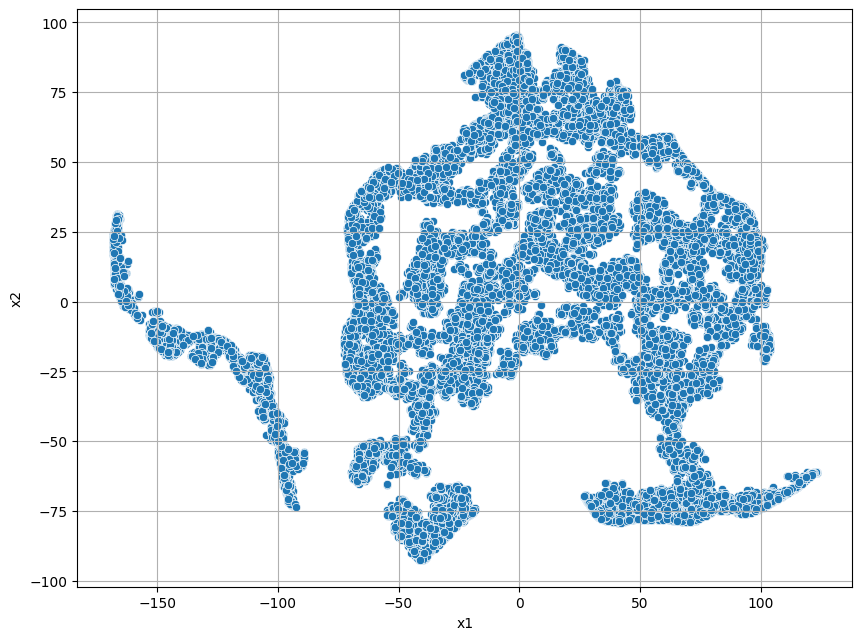

In [353]:
plt.figure(figsize=(10,7.5))
sns.scatterplot(data=X_test_embedded, x="x1", y="x2")
plt.grid(True)

In [344]:
df.loc[index, "cluster"].info()

<class 'pandas.core.series.Series'>
Index: 14260 entries, 75 to 2649069
Series name: cluster
Non-Null Count  Dtype  
--------------  -----  
14260 non-null  float64
dtypes: float64(1)
memory usage: 222.8 KB


In [218]:
# X_test.loc[X_test["cluster"] == 2].describe()

In [158]:
from sklearn.decomposition import PCA

X_test_embedded = PCA(n_components=20).fit_transform(X_test.iloc[:, :-1])
hdb = HDBSCAN(min_cluster_size=50, n_jobs=-1)
cluster = hdb.fit_predict(X_test_embedded)

X_test_embedded = TSNE(n_components=2, n_jobs=-1).fit_transform(X_test_embedded)
X_test_embedded = pd.DataFrame(X_test_embedded, columns=["x1", "x2"])
X_test_embedded["cluster"] = cluster
X_test_embedded["cluster"] = X_test_embedded["cluster"].astype(str)

In [159]:
X_test_embedded["cluster"].value_counts()

cluster
-1    9037
6     1235
1     1063
5      871
9      505
7      392
8      375
2      227
10     211
3      144
4      128
0       72
Name: count, dtype: int64

In [323]:
X_test["cluster"]

75         5
155        5
318        0
445        5
2053       5
          ..
2648341    3
2648550    5
2648849    5
2649006    6
2649069    6
Name: cluster, Length: 14260, dtype: int64